Table of Content
1. Import libraries
2. Scrape Manchester City and Liverpool 2021-2022 Premier League Games from https://fbref.com/en/comps/9/Premier-League-Stats
3. Visualize Analysis Both teams Season Performance 

Import Libraries 

In [ ]:
#import libraries 
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import seaborn as sns 
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot

Script to web scrape needed data 

In [ ]:
#script to scrape needed data
standings_url = "https://fbref.com/en/comps/9/Premier-League-Stats"
data = requests.get(standings_url)

soup = BeautifulSoup(data.text)
standings_table = soup.select('table.stats_table')[0]
links = standings_table.find_all('a')
links = [l.get("href") for l in links]
links = [l for l in links if '/squads/' in l]

team_urls = [f"https://fbref.com{l}" for l in links]
data = requests.get(team_urls[0])



In [ ]:
team_urls

['https://fbref.com/en/squads/b8fd03ef/Manchester-City-Stats',
 'https://fbref.com/en/squads/822bd0ba/Liverpool-Stats',
 'https://fbref.com/en/squads/cff3d9bb/Chelsea-Stats',
 'https://fbref.com/en/squads/361ca564/Tottenham-Hotspur-Stats',
 'https://fbref.com/en/squads/18bb7c10/Arsenal-Stats',
 'https://fbref.com/en/squads/19538871/Manchester-United-Stats',
 'https://fbref.com/en/squads/7c21e445/West-Ham-United-Stats',
 'https://fbref.com/en/squads/a2d435b3/Leicester-City-Stats',
 'https://fbref.com/en/squads/d07537b9/Brighton-and-Hove-Albion-Stats',
 'https://fbref.com/en/squads/8cec06e1/Wolverhampton-Wanderers-Stats',
 'https://fbref.com/en/squads/b2b47a98/Newcastle-United-Stats',
 'https://fbref.com/en/squads/47c64c55/Crystal-Palace-Stats',
 'https://fbref.com/en/squads/cd051869/Brentford-Stats',
 'https://fbref.com/en/squads/8602292d/Aston-Villa-Stats',
 'https://fbref.com/en/squads/33c895d4/Southampton-Stats',
 'https://fbref.com/en/squads/d3fd31cc/Everton-Stats',
 'https://fbref.

In [ ]:
Man_city_stats = pd.read_html(data.text, match="Scores & Fixtures")[0]
Man_city_stats.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2021-08-07,17:15,Community Shield,FA Community Shield,Sat,Neutral,L,0,1,Leicester City,NaN,NaN,57,NaN,Fernandinho,4-3-3,Paul Tierney,Match Report,NaN
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0,1,Tottenham,1.9,1.3,64,58262.0,Fernandinho,4-3-3,Anthony Taylor,Match Report,NaN
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5,0,Norwich City,2.7,0.1,67,51437.0,İlkay Gündoğan,4-3-3,Graham Scott,Match Report,NaN
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5,0,Arsenal,3.8,0.1,80,52276.0,İlkay Gündoğan,4-3-3,Martin Atkinson,Match Report,NaN
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1,0,Leicester City,2.9,0.8,61,32087.0,İlkay Gündoğan,4-3-3,Paul Tierney,Match Report,NaN


Preprocessing Manchester City Data for Analysis

In [ ]:
#drop irrlavent data 
Man_city_stats = Man_city_stats.drop(['Attendance', 'Captain','Referee', 'Notes','Match Report'], axis=1)

#select only premier league games 
Man_city_stats = Man_city_stats.loc[Man_city_stats['Comp'] == 'Premier League']
Man_city_stats = Man_city_stats.set_index('Round')

In [ ]:
#check data types
Man_city_stats.dtypes

Date          object
Time          object
Comp          object
Day           object
Venue         object
Result        object
GF            object
GA            object
Opponent      object
xG           float64
xGA          float64
Poss           int64
Formation     object
dtype: object

In [ ]:
# change columns GF and GA to numeric values
Man_city_stats["GF"] = pd.to_numeric(Man_city_stats["GF"])
Man_city_stats["GA"] = pd.to_numeric(Man_city_stats["GA"])

In [ ]:
# scripts to add 3 more columns Total goals, Total goals Against, Man_City Points
y = 0
l = []
for x in Man_city_stats.GF:
  y = y + x
  l.append(y)

Man_city_stats['Total goals'] = l

w = 0 
ll = []

for e in Man_city_stats.GA:
  w = w + e
  ll.append(w)
  
Man_city_stats['Total goals Against'] = ll


tp = 0 
tpl = []
for x in Man_city_stats.Result:
  if x == 'W':
    tp = tp + 3
    tpl.append(tp)
  if x == 'D':
    tp = tp + 1
    tpl.append(tp)
  if x == 'L':
    tp = tp + 0
    tpl.append(tp)

Man_city_stats['Man_City Points'] = tpl

In [ ]:
Man_city_stats.head()

,Date,Time,Comp,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Formation,Total goals,Total goals Against,Man_City Points
Round,,,,,,,,,,,,,,,,
Matchweek 1,2021-08-15,16:30,Premier League,Sun,Away,L,0,1,Tottenham,1.9,1.3,64,4-3-3,0,1,0
Matchweek 2,2021-08-21,15:00,Premier League,Sat,Home,W,5,0,Norwich City,2.7,0.1,67,4-3-3,5,1,3
Matchweek 3,2021-08-28,12:30,Premier League,Sat,Home,W,5,0,Arsenal,3.8,0.1,80,4-3-3,10,1,6
Matchweek 4,2021-09-11,15:00,Premier League,Sat,Away,W,1,0,Leicester City,2.9,0.8,61,4-3-3,11,1,9
Matchweek 5,2021-09-18,15:00,Premier League,Sat,Home,D,0,0,Southampton,1.1,0.4,63,4-3-3,11,1,10


Data Visualization: Visually Communicate Findings

W    29
D     6
L     3
Name: Result, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



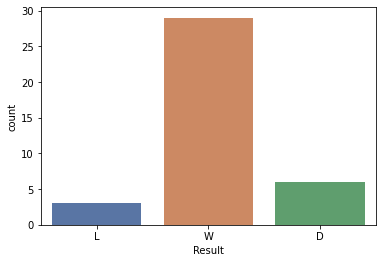

In [ ]:
# how many wins, draws, and loses 
print(Man_city_stats.Result.value_counts())
print(sns.countplot(Man_city_stats.Result, palette = 'deep'))

In [ ]:
fig = px.box(Man_city_stats, x="Result", y="Poss", color='Result')
fig.show()

In [ ]:
Man_city_stats[['GF', 'GA', 'xG', 'xGA', 'Poss']].describe()

,GF,GA,xG,xGA,Poss
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,2.605263,0.684211,2.342105,0.715789,67.868421
std,1.793976,0.903604,0.964962,0.504856,7.067899
min,0.000000,0.000000,0.700000,0.100000,51.000000
25%,1.000000,0.000000,1.725000,0.300000,64.000000
50%,2.000000,0.000000,2.200000,0.650000,69.000000
75%,4.000000,1.000000,3.075000,1.000000,72.750000
max,7.000000,3.000000,4.600000,2.400000,80.000000


In [ ]:
# man city preformance away and home 
Man_city_stats.groupby(['Venue']).mean()

,GF,GA,xG,xGA,Poss,Total goals,Total goals Against,Man_City Points
Venue,,,,,,,,
Away,2.157895,0.578947,2.315789,0.784211,67.210526,46.315789,11.315789,46.526316
Home,3.052632,0.789474,2.368421,0.647368,68.526316,47.052632,11.842105,47.105263


In [ ]:
# Goals Man City scored at home and away
fig = px.box(Man_city_stats, x="Venue", y="GF",color='Venue')
fig.show()

In [ ]:
# Goal scored against Man City at home and away
fig = px.box(Man_city_stats, x="Venue", y="GA", color='Venue')
fig.show()

In [ ]:
#check for the different formations Man city lines up 
Man_city_stats.Formation.value_counts()

4-3-3      32
4-2-3-1     6
Name: Formation, dtype: int64

In [ ]:
# mean Performance based on formation
Man_city_stats.groupby(['Formation']).mean()

,GF,GA,xG,xGA,Poss,Total goals,Total goals Against,Man_City Points
Formation,,,,,,,,
4-2-3-1,3.833333,0.833333,2.466667,0.833333,64.833333,74.666667,18.833333,74.00000
4-3-3,2.375000,0.656250,2.318750,0.693750,68.437500,41.437500,10.218750,41.71875


In [ ]:
# teams man city lose or draw against 
gamesmcLD = Man_city_stats.loc[Man_city_stats['Result'] != 'W']
gamesmcLD

,Date,Time,Comp,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Formation,Total goals,Total goals Against,Man_City Points
Round,,,,,,,,,,,,,,,,
Matchweek 1,2021-08-15,16:30,Premier League,Sun,Away,L,0,1,Tottenham,1.9,1.3,64,4-3-3,0,1,0
Matchweek 5,2021-09-18,15:00,Premier League,Sat,Home,D,0,0,Southampton,1.1,0.4,63,4-3-3,11,1,10
Matchweek 7,2021-10-03,16:30,Premier League,Sun,Away,D,2,2,Liverpool,1.2,1.0,51,4-3-3,14,3,14
Matchweek 10,2021-10-30,15:00,Premier League,Sat,Home,L,0,2,Crystal Palace,1.1,1.1,68,4-3-3,20,6,20
Matchweek 23,2022-01-22,17:30,Premier League,Sat,Away,D,1,1,Southampton,1.6,1.1,73,4-3-3,55,14,57
Matchweek 26,2022-02-19,17:30,Premier League,Sat,Home,L,2,3,Tottenham,2.1,1.8,71,4-3-3,63,17,63
Matchweek 29,2022-03-14,20:00,Premier League,Mon,Away,D,0,0,Crystal Palace,2.3,0.8,74,4-3-3,68,18,70
Matchweek 32,2022-04-10,16:30,Premier League,Sun,Home,D,2,2,Liverpool,2.0,1.0,55,4-2-3-1,72,20,74
Matchweek 37,2022-05-15,14:00,Premier League,Sun,Away,D,2,2,West Ham,2.5,1.3,78,4-3-3,96,24,90


In [ ]:
# name and matchweek teams man city lose or draw against 
gamesmcLD.Opponent

Round
Matchweek 1          Tottenham
Matchweek 5        Southampton
Matchweek 7          Liverpool
Matchweek 10    Crystal Palace
Matchweek 23       Southampton
Matchweek 26         Tottenham
Matchweek 29    Crystal Palace
Matchweek 32         Liverpool
Matchweek 37          West Ham
Name: Opponent, dtype: object

Man city Home record
W    15
D     2
L     2
Name: Result, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



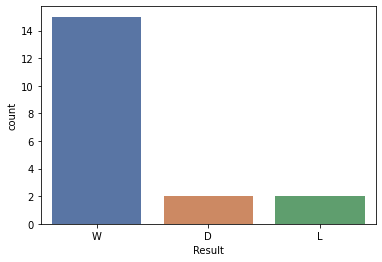

In [ ]:
# Check Man city home record 
mancity_home = Man_city_stats.loc[Man_city_stats['Venue'] == 'Home']
print('Man city Home record')
print(mancity_home.Result.value_counts())
print(sns.countplot(mancity_home.Result, palette = 'deep'))

Man city away record
W    14
D     4
L     1
Name: Result, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



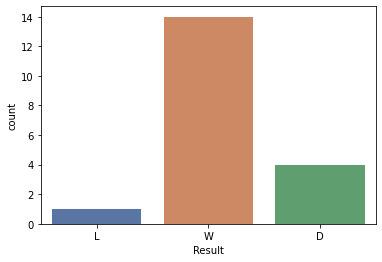

In [ ]:
# Check Man city away record 
mancity_away = Man_city_stats.loc[Man_city_stats['Venue'] != 'Home']
print('Man city away record')
print(mancity_away.Result.value_counts())
print(sns.countplot(mancity_away.Result, palette = 'deep'))

In [ ]:
#check the rate of goals scored by Man city and goals scored against Man city 
fig = px.line(Man_city_stats, x=Man_city_stats.index, y=Man_city_stats.columns[-3:-1] ,markers=True)
fig.show()

Now Lets Analyse LiverPool Season:

Preprocessing LiverPool Data for Analysis

In [ ]:
x = team_urls[1]
data2 = requests.get(x)

In [ ]:
Liverpool_stats = pd.read_html(data2.text, match="Scores & Fixtures")[0]
Liverpool_stats.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2021-08-14,17:30,Premier League,Matchweek 1,Sat,Away,W,3,0,Norwich City,2.0,1.4,51,27023,James Milner,4-3-3,Andre Marriner,Match Report,NaN
1,2021-08-21,12:30,Premier League,Matchweek 2,Sat,Home,W,2,0,Burnley,2.9,0.7,63,52591,Jordan Henderson,4-3-3,Mike Dean,Match Report,NaN
2,2021-08-28,17:30,Premier League,Matchweek 3,Sat,Home,D,1,1,Chelsea,2.6,0.8,65,54000,Jordan Henderson,4-3-3,Anthony Taylor,Match Report,NaN
3,2021-09-12,16:30,Premier League,Matchweek 4,Sun,Away,W,3,0,Leeds United,4.0,1.2,57,36507,Virgil van Dijk,4-3-3,Craig Pawson,Match Report,NaN
4,2021-09-15,20:00,Champions Lg,Group stage,Wed,Home,W,3,2,it Milan,2.4,1.4,60,51445,Jordan Henderson,4-3-3,Szymon Marciniak,Match Report,NaN


In [ ]:
#drop irrlavent data 
Liverpool_stats = Liverpool_stats.drop(['Attendance', 'Captain','Referee', 'Notes','Match Report'], axis=1)

#select only premier league games 
Liverpool_stats = Liverpool_stats.loc[Liverpool_stats['Comp'] == 'Premier League']
Liverpool_stats = Liverpool_stats.set_index('Round')

In [ ]:
Liverpool_stats.head()

,Date,Time,Comp,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Formation
Round,,,,,,,,,,,,,
Matchweek 1,2021-08-14,17:30,Premier League,Sat,Away,W,3,0,Norwich City,2.0,1.4,51,4-3-3
Matchweek 2,2021-08-21,12:30,Premier League,Sat,Home,W,2,0,Burnley,2.9,0.7,63,4-3-3
Matchweek 3,2021-08-28,17:30,Premier League,Sat,Home,D,1,1,Chelsea,2.6,0.8,65,4-3-3
Matchweek 4,2021-09-12,16:30,Premier League,Sun,Away,W,3,0,Leeds United,4.0,1.2,57,4-3-3
Matchweek 5,2021-09-18,15:00,Premier League,Sat,Home,W,3,0,Crystal Palace,2.7,0.8,59,4-3-3


In [ ]:
# change columns GF and GA to numeric values
Liverpool_stats["GF"] = pd.to_numeric(Liverpool_stats["GF"])
Liverpool_stats["GA"] = pd.to_numeric(Liverpool_stats["GA"])

In [ ]:
# scripts to add 3 more columns Total goals, Total goals Against, LiverPool Points
yy = 0
l2 = []
for x in Liverpool_stats.GF:
  yy = yy + x
  l2.append(yy)

Liverpool_stats['Total goals'] = l2

ww = 0 
lll = []

for e in Liverpool_stats.GA:
  ww = ww + e
  lll.append(ww)

Liverpool_stats['Total goals Against'] = lll

tp = 0 
tpl = []
for x in Liverpool_stats.Result:
  if x == 'W':
    tp = tp + 3
    tpl.append(tp)
  if x == 'D':
    tp = tp + 1
    tpl.append(tp)
  if x == 'L':
    tp = tp + 0
    tpl.append(tp)

Liverpool_stats['LiverPool Points'] = tpl

In [ ]:
Liverpool_stats.head()

,Date,Time,Comp,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Formation,Total goals,Total goals Against,LiverPool Points
Round,,,,,,,,,,,,,,,,
Matchweek 1,2021-08-14,17:30,Premier League,Sat,Away,W,3,0,Norwich City,2.0,1.4,51,4-3-3,3,0,3
Matchweek 2,2021-08-21,12:30,Premier League,Sat,Home,W,2,0,Burnley,2.9,0.7,63,4-3-3,5,0,6
Matchweek 3,2021-08-28,17:30,Premier League,Sat,Home,D,1,1,Chelsea,2.6,0.8,65,4-3-3,6,1,7
Matchweek 4,2021-09-12,16:30,Premier League,Sun,Away,W,3,0,Leeds United,4.0,1.2,57,4-3-3,9,1,10
Matchweek 5,2021-09-18,15:00,Premier League,Sat,Home,W,3,0,Crystal Palace,2.7,0.8,59,4-3-3,12,1,13


Data Visualization: Visually Communicate Findings

W    28
D     8
L     2
Name: Result, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



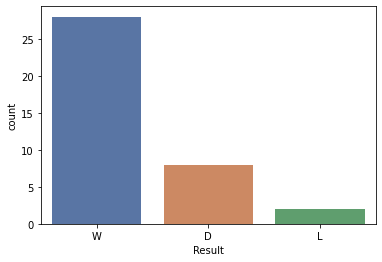

In [ ]:
# how many wins, draws, and loses 
print(Liverpool_stats.Result.value_counts())
print(sns.countplot(Liverpool_stats.Result, palette = 'deep'))

In [ ]:
fig = px.box(Liverpool_stats, x="Result", y="Poss", color='Result')
fig.show()

In [ ]:
Liverpool_stats[['GF', 'GA', 'xG', 'xGA', 'Poss']].describe()

,GF,GA,xG,xGA,Poss
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,2.473684,0.684211,2.344737,0.905263,62.789474
std,1.288973,0.903604,0.956259,0.673413,8.399350
min,0.000000,0.000000,0.800000,0.100000,45.000000
25%,2.000000,0.000000,1.600000,0.425000,57.500000
50%,2.000000,0.000000,2.350000,0.800000,63.500000
75%,3.000000,1.000000,2.675000,1.175000,68.000000
max,6.000000,3.000000,5.000000,3.400000,81.000000


In [ ]:
# preformance away and home 
Liverpool_stats.groupby(['Venue']).mean()

,GF,GA,xG,xGA,Poss,Total goals,Total goals Against,LiverPool Points
Venue,,,,,,,,
Away,2.368421,0.894737,2.126316,1.121053,60.000000,50.421053,14.315789,44.421053
Home,2.578947,0.473684,2.563158,0.689474,65.578947,51.684211,14.368421,45.842105


In [ ]:
# Goals LiverPool scored at home and away
fig = px.box(Liverpool_stats, x="Venue", y="GF",color='Venue')
fig.show()

In [ ]:
# Goal scored against LiverPool at home and away
fig = px.box(Liverpool_stats, x="Venue", y="GA", color='Venue')
fig.show()

In [ ]:
Liverpool_stats.Formation.value_counts()

4-3-3    38
Name: Formation, dtype: int64

In [ ]:
# teams LiverPool lose or draw againest 
gameslLD = Liverpool_stats.loc[Liverpool_stats['Result'] != 'W']
gameslLD

,Date,Time,Comp,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Formation,Total goals,Total goals Against,LiverPool Points
Round,,,,,,,,,,,,,,,,
Matchweek 3,2021-08-28,17:30,Premier League,Sat,Home,D,1,1,Chelsea,2.6,0.8,65,4-3-3,6,1,7
Matchweek 6,2021-09-25,17:30,Premier League,Sat,Away,D,3,3,Brentford,2.5,1.9,66,4-3-3,15,4,14
Matchweek 7,2021-10-03,16:30,Premier League,Sun,Home,D,2,2,Manchester City,1.0,1.2,49,4-3-3,17,6,15
Matchweek 10,2021-10-30,15:00,Premier League,Sat,Home,D,2,2,Brighton,1.1,1.1,57,4-3-3,29,8,22
Matchweek 11,2021-11-07,16:30,Premier League,Sun,Away,L,2,3,West Ham,1.4,1.0,68,4-3-3,31,11,22
Matchweek 18,2021-12-19,16:30,Premier League,Sun,Away,D,2,2,Tottenham,1.5,3.4,57,4-3-3,50,15,41
Matchweek 20,2021-12-28,20:00,Premier League,Tue,Away,L,0,1,Leicester City,2.5,0.6,62,4-3-3,50,16,41
Matchweek 21,2022-01-02,16:30,Premier League,Sun,Away,D,2,2,Chelsea,1.4,1.3,45,4-3-3,52,18,42
Matchweek 32,2022-04-10,16:30,Premier League,Sun,Away,D,2,2,Manchester City,1.0,2.0,45,4-3-3,79,22,73


In [ ]:
# name and matchweek teams LiverPool lose or draw against 
gameslLD.Opponent

Round
Matchweek 3             Chelsea
Matchweek 6           Brentford
Matchweek 7     Manchester City
Matchweek 10           Brighton
Matchweek 11           West Ham
Matchweek 18          Tottenham
Matchweek 20     Leicester City
Matchweek 21            Chelsea
Matchweek 32    Manchester City
Matchweek 36          Tottenham
Name: Opponent, dtype: object

Liverpool Home record
W    15
D     4
Name: Result, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



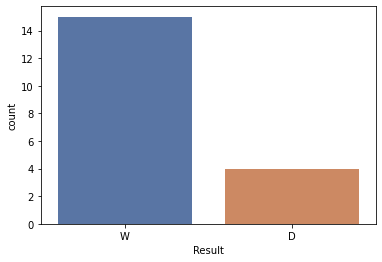

In [ ]:
#check LiverPool home record 
liverpool_home = Liverpool_stats.loc[Liverpool_stats['Venue'] == 'Home']
print('Liverpool Home record')
print(liverpool_home.Result.value_counts())
print(sns.countplot(liverpool_home.Result, palette = 'deep'))


Liverpool away record
W    13
D     4
L     2
Name: Result, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



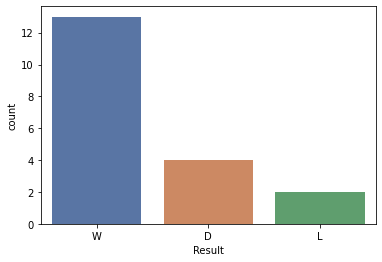

In [ ]:
#check LiverPool away record 
liverpool_away = Liverpool_stats.loc[Liverpool_stats['Venue'] != 'Home']
print('Liverpool away record')
print(liverpool_away.Result.value_counts())
print(sns.countplot(liverpool_away.Result, palette = 'deep'))

In [ ]:
#check the rate of goals scored by LiverPool and goals scored against LiverPool
fig = px.line(Liverpool_stats, x=Liverpool_stats.index, y=Liverpool_stats.columns[-3:-1] ,markers=True)
fig.show()

Now compare LiverPool and Man City points accumulation, goals scored and goals scored against over the season. 

In [ ]:
PointsL = Liverpool_stats['LiverPool Points'].values
PointsMC = Man_city_stats['Man_City Points'].values

In [ ]:
frames = {'LiverPool Points':PointsL,'Man_City Points':PointsMC}
frames = pd.DataFrame(frames, columns=['LiverPool Points','Man_City Points'])

In [ ]:
#check points accumulation for both teams over the season 
fig = px.line(frames, y=frames.columns[-2:], markers=True)
fig.show()

In [ ]:
L = Liverpool_stats['Total goals'].values
L2 = Liverpool_stats['Total goals Against'].values
GoalLP = {'LiverPool Total goals':L,'LiverPool Total goals Against':L2}
GoalLP = pd.DataFrame(GoalLP)

In [ ]:
M = Man_city_stats['Total goals'].values
M2 = Man_city_stats['Total goals Against'].values
GoalsMC = {'Man City Total goals':M,'Man City Total goals Against':M2}
GoalsMC = pd.DataFrame(GoalsMC)

In [ ]:
result = pd.concat([GoalLP, GoalsMC], axis=1)


In [ ]:
# check goals scored and goals scored against over the season for both teams
fig = px.line(result, y=result.columns, markers=True)
fig.show()